# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
#--------------------------------------------------
# DEPENDANCIES
#--------------------------------------------------
import os
import json
import requests
import pandas as pd
from api_keys import weather_api_key
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [5]:
#--------------------------------------------------
# IMPRORT WORLD CITIES CSV
#--------------------------------------------------
city_data_path = "worldcities.csv"
city_data = pd.read_csv(city_data_path)
city_data.head()

#--------------------------------------------------
# GENERATE RANDOM LIST OF 500 CITIES
#--------------------------------------------------
cities = random.sample(list(city_data["City"]),650)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#--------------------------------------------------
# CREATE REQUIRED EMPTY LISTS
#--------------------------------------------------
city_list = []
lat_list = []
long_list = []
temparature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_number = 0

# Loop through each character
for city in cities:
    city_number += 1
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Create search query, make request and store in json
    response = requests.get(query_url)
    response_json = response.json()
    
    print(f'City number {city_number} is {city}.')
    # print(f'{query_url}')
    # print(response_json)    

    #--------------------------------------------------
    # APPEND VALUES TO LISTS
    #--------------------------------------------------
    try:
        city_list.append(response_json["name"])
        lat_list.append(response_json["coord"]["lat"])
        long_list.append(response_json["coord"]["lon"])
        temparature_list.append(response_json["main"]["temp_max"])
        humidity_list.append(response_json["main"]["humidity"])
        cloudiness_list.append(response_json["clouds"]["all"])
        wind_speed_list.append(response_json["wind"]["speed"])
    except:
        KeyError


City number 1 is ginosa.
City number 2 is sukuta.
City number 3 is dabrowa tarnowska.
City number 4 is verkhne-katunskoye.
City number 5 is newton.
City number 6 is tamazunchale.
City number 7 is bhadrak.
City number 8 is bashtanka.
City number 9 is newburg.
City number 10 is thespiai.
City number 11 is sancoale.
City number 12 is teiu.
City number 13 is getafe.
City number 14 is durban.
City number 15 is mahayag.
City number 16 is siquinala.
City number 17 is naro.
City number 18 is metsavan.
City number 19 is red deer.
City number 20 is volnovakha.
City number 21 is new lagao.
City number 22 is lugovoy.
City number 23 is miedzyrzec podlaski.
City number 24 is hualmay.
City number 25 is lopukhiv.
City number 26 is betki.
City number 27 is gyanpur.
City number 28 is sheoganj.
City number 29 is torre-pacheco.
City number 30 is delvada.
City number 31 is lomitas.
City number 32 is gurnee.
City number 33 is perelyub.
City number 34 is lesnyye polyany.
City number 35 is tacuarembo.
City nu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create output df with required results
output_df = pd.DataFrame(
    {"City": city_list,
     "Latitude": lat_list,
     "Longitude": long_list,
     "Temperature": temparature_list,
     "Humidity": humidity_list,
     "Cloudiness": cloudiness_list,    
     "Wind_Speed": wind_speed_list,    
    }
)

output_df.to_csv('cities_df.csv')
output_df


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Ginosa,40.5801,16.7561,286.79,91,63,0.69
1,Sukuta,13.4103,-16.7082,294.16,78,0,2.06
2,Dąbrowa Tarnowska,50.1746,20.9863,280.20,86,57,1.83
3,Newton,42.3370,-71.2092,285.71,50,60,1.34
4,Tamazunchale,21.2667,-98.7833,296.11,75,0,1.04
...,...,...,...,...,...,...,...
599,Gainza,13.6165,123.1419,304.64,61,79,1.81
600,Ettingen,47.4827,7.5498,282.28,86,100,2.57
601,Aztec,36.8222,-107.9929,282.82,23,43,5.18
602,Băleşti,45.0167,23.2167,281.29,79,1,0.83


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

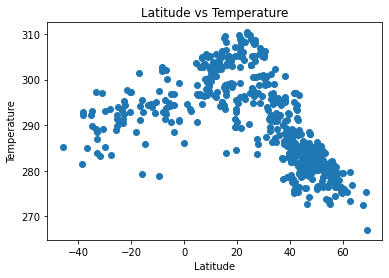

In [8]:
# Set x_values and y_values
x_values = lat_list
y_values = temparature_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Temperature.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------

## Latitude vs. Humidity Plot

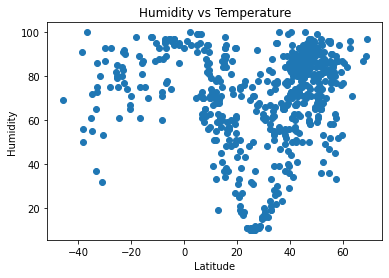

In [9]:
# Set x_values and y_values
x_values = lat_list
y_values = humidity_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Temperature")

# Save to Images folder
plt.savefig("Images/Humidity_vs_Temperature.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------

## Latitude vs. Cloudiness Plot

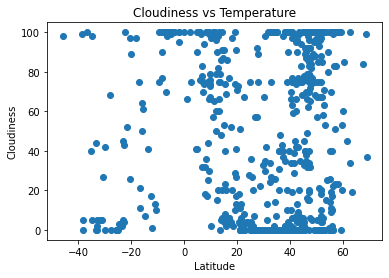

In [10]:
# Set x_values and y_values
x_values = lat_list
y_values = cloudiness_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Temperature")

# Save to Images folder
plt.savefig("Images/Cloudiness_vs_Temperature.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------

## Latitude vs. Wind Speed Plot

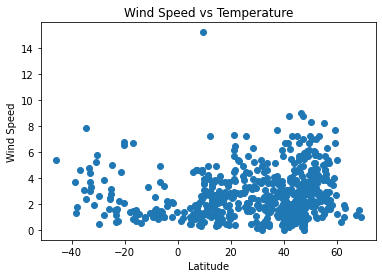

In [11]:
# Set x_values and y_values
x_values = lat_list
y_values = wind_speed_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Temperature")

# Save to Images folder
plt.savefig("Images/Wind_Speed_vs_Temperature.png");

#---------------------------------------------------------------------
# NEED TO ADD A SENTENCE OR TWO EXPLAINING WHAT THE CODE IS ANALYSING
#---------------------------------------------------------------------


## Linear Regression

In [12]:
north_hem_df = output_df.loc[output_df['Latitude'] >= 0]
south_hem_df = output_df.loc[output_df['Latitude'] < 0]

north_lat = north_hem_df["Latitude"]
north_long = north_hem_df["Longitude"]
north_temp = north_hem_df["Temperature"]
north_humidity = north_hem_df["Humidity"]
north_cloud = north_hem_df["Cloudiness"]
north_wind = north_hem_df["Wind_Speed"]

south_lat = south_hem_df["Latitude"]
south_long = south_hem_df["Longitude"]
south_temp = south_hem_df["Temperature"]
south_humidity = south_hem_df["Humidity"]
south_cloud = south_hem_df["Cloudiness"]
south_wind = south_hem_df["Wind_Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line_eq is: y = -0.53x + 308.71


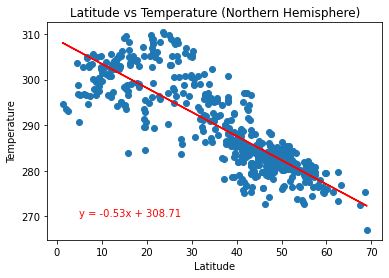

In [13]:
# Set x_values and y_values
x_values = north_lat
y_values = north_temp

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,270),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Temperature (Northern Hemisphere).png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line_eq is: y = 0.17x + 295.53


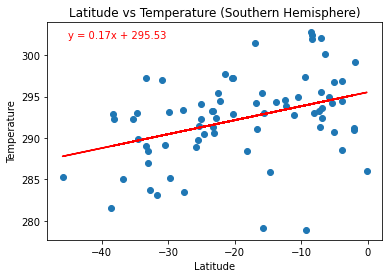

In [14]:
# Set x_values and y_values
x_values = south_lat
y_values = south_temp

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,302),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Temperature (Southern Hemisphere).png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line_eq is: y = 0.42x + 54.15


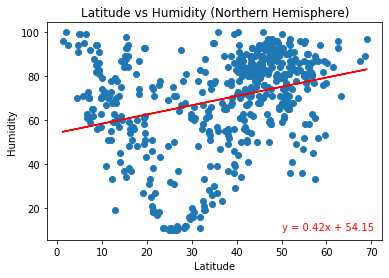

In [15]:
# Set x_values and y_values
x_values = north_lat
y_values = north_humidity

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Humidity (Northern Hemisphere).png")



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line_eq is: y = 0.65x + 92.85


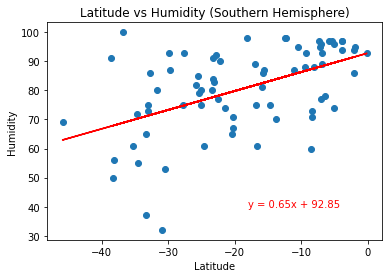

In [17]:
# Set x_values and y_values
x_values = south_lat
y_values = south_humidity

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,40),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Humidity (Southern Hemisphere).png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line_eq is: y = 0.19x + 41.26


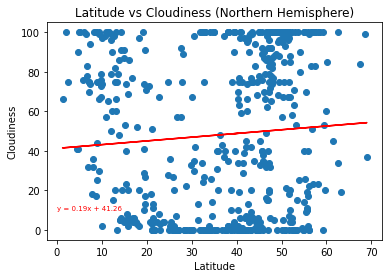

In [20]:
# Set x_values and y_values
x_values = north_lat
y_values = north_cloud

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=7,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Cloudiness (Northern Hemisphere).png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line_eq is: y = 2.02x + 90.74


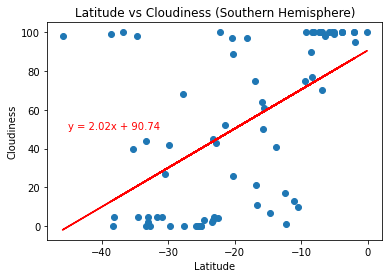

In [21]:
# Set x_values and y_values
x_values = south_lat
y_values = south_cloud

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,50),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Cloudiness (Southern Hemisphere).png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line_eq is: y = 0.02x + 2.12


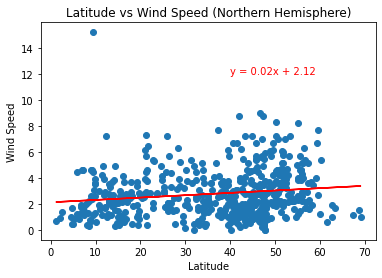

In [23]:
# Set x_values and y_values
x_values = north_lat
y_values = north_wind

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Wind Speed (Northern Hemisphere).png")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line_eq is: y = -0.06x + 1.3


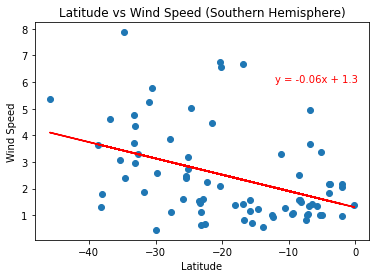

In [25]:
# Set x_values and y_values
x_values = south_lat
y_values = south_wind

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-12,6),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Wind Speed (Southern Hemisphere).png")

